# PHASE-3

# 3.1	 Insert records from 42_District_wise_crimes_committed_against_women_2001_2012.csv into a table.

In [1]:
import pandas as pd
import sqlite3

In [25]:
df1=pd.read_csv("C:\\Users\\S S\\OneDrive\\Desktop\\CAPSTONE PROJECT\\PROJECT\\India_Crime\\42_District_wise_crimes_committed_against_women_2001_2012.csv")

In [26]:
df1.columns = [c.replace(' ', '_').replace('/', '_').replace('(', '').replace(')', '') for c in df1.columns]
print(df1.head())

         STATE_UT       DISTRICT  Year  Rape  Kidnapping_and_Abduction  \
0  ANDHRA PRADESH       ADILABAD  2001    50                        30   
1  ANDHRA PRADESH      ANANTAPUR  2001    23                        30   
2  ANDHRA PRADESH       CHITTOOR  2001    27                        34   
3  ANDHRA PRADESH       CUDDAPAH  2001    20                        20   
4  ANDHRA PRADESH  EAST GODAVARI  2001    23                        26   

   Dowry_Deaths  Assault_on_women_with_intent_to_outrage_her_modesty  \
0            16                                                149     
1             7                                                118     
2            14                                                112     
3            17                                                126     
4            12                                                109     

   Insult_to_modesty_of_Women  Cruelty_by_Husband_or_his_Relatives  \
0                          34                       

In [27]:
connect1=sqlite3.connect('crimes1.db')

df1.to_sql('DistrictCrimesAgainstWomen',connect1,if_exists='replace',index=False)

8609

In [28]:
cursor = connect1.cursor()
cursor.execute('SELECT * FROM DistrictCrimesAgainstWomen LIMIT 10')
result = cursor.fetchall()

for row in result:
    print(row)
    
    
connect1.close()

('ANDHRA PRADESH', 'ADILABAD', 2001, 50, 30, 16, 149, 34, 175, 0)
('ANDHRA PRADESH', 'ANANTAPUR', 2001, 23, 30, 7, 118, 24, 154, 0)
('ANDHRA PRADESH', 'CHITTOOR', 2001, 27, 34, 14, 112, 83, 186, 0)
('ANDHRA PRADESH', 'CUDDAPAH', 2001, 20, 20, 17, 126, 38, 57, 0)
('ANDHRA PRADESH', 'EAST GODAVARI', 2001, 23, 26, 12, 109, 58, 247, 0)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 0, 0, 0, 1, 0, 0, 0)
('ANDHRA PRADESH', 'GUNTUR', 2001, 54, 51, 7, 139, 129, 378, 0)
('ANDHRA PRADESH', 'HYDERABAD CITY', 2001, 37, 39, 24, 118, 27, 746, 0)
('ANDHRA PRADESH', 'KARIMNAGAR', 2001, 56, 49, 62, 414, 81, 224, 0)
('ANDHRA PRADESH', 'KHAMMAM', 2001, 47, 30, 17, 180, 336, 172, 0)


# 3.2	Write SQL query to find the highest number of rapes & Kidnappings that happened in which state, District, and year.

In [29]:
conn = sqlite3.connect('crimes1.db')

In [30]:
query1=conn.execute("SELECT State_UT,District,Year,Kidnapping_and_Abduction FROM DistrictCrimesAgainstWomen WHERE Kidnapping_and_Abduction = (SELECT MAX(Kidnapping_and_Abduction) FROM DistrictCrimesAgainstWomen)");

result = query1.fetchall()

for row in result:
    print(f"State: {row[0]}, District: {row[1]}, Year: {row[2]}, Kidnapping Cases: {row[3]}")


State: DELHI, District: DELHI UT TOTAL, Year: 2012, Kidnapping Cases: 2160


In [31]:
query2=conn.execute("SELECT State_UT,District,Year,Rape FROM DistrictCrimesAgainstWomen WHERE Rape=(SELECT MAX(Rape) FROM DistrictCrimesAgainstWomen)");

result2=query2.fetchall()

for row in result2:
    print(f"State: {row[0]}, District: {row[1]}, Year: {row[2]}, Rape Cases: {row[3]}")

State: DELHI, District: DELHI UT TOTAL, Year: 2012, Rape Cases: 706


# 3.3	Write SQL query to find All the lowest number of rapes & Kidnappings that happened in which state, District, and year.

In [33]:
query3=conn.execute("SELECT State_UT,District,Year,Kidnapping_and_Abduction FROM DistrictCrimesAgainstWomen WHERE Kidnapping_and_Abduction = (SELECT MIN(Kidnapping_and_Abduction) FROM DistrictCrimesAgainstWomen)");

result3 = query3.fetchall()

for row in result3:
    print(f"State: {row[0]}, District: {row[1]}, Year: {row[2]}, Kidnapping Cases: {row[3]}")

State: ANDHRA PRADESH, District: GUNTAKAL RLY., Year: 2001, Kidnapping Cases: 0
State: ANDHRA PRADESH, District: SECUNDERABAD RLY., Year: 2001, Kidnapping Cases: 0
State: ANDHRA PRADESH, District: VIJAYAWADA RLY., Year: 2001, Kidnapping Cases: 0
State: ARUNACHAL PRADESH, District: TAWANG, Year: 2001, Kidnapping Cases: 0
State: ASSAM, District: C.I.D., Year: 2001, Kidnapping Cases: 0
State: ASSAM, District: G.R.P., Year: 2001, Kidnapping Cases: 0
State: ASSAM, District: R.P.O., Year: 2001, Kidnapping Cases: 0
State: BIHAR, District: ARWAL, Year: 2001, Kidnapping Cases: 0
State: BIHAR, District: JAMALPUR RLY., Year: 2001, Kidnapping Cases: 0
State: CHHATTISGARH, District: BIZAPUR, Year: 2001, Kidnapping Cases: 0
State: CHHATTISGARH, District: GRP RAIPUR, Year: 2001, Kidnapping Cases: 0
State: CHHATTISGARH, District: KAWARDHA, Year: 2001, Kidnapping Cases: 0
State: GUJARAT, District: W.RLY, Year: 2001, Kidnapping Cases: 0
State: HIMACHAL PRADESH, District: G.R.P., Year: 2001, Kidnapping C

In [34]:
query4=conn.execute("SELECT State_UT,District,Year,Rape FROM DistrictCrimesAgainstWomen WHERE Rape=(SELECT MIN(Rape) FROM DistrictCrimesAgainstWomen)");

result4=query4.fetchall()

for row in result4:
    print(f"State: {row[0]}, District: {row[1]}, Year: {row[2]}, Rape Cases: {row[3]}")

State: ANDHRA PRADESH, District: GUNTAKAL RLY., Year: 2001, Rape Cases: 0
State: ANDHRA PRADESH, District: SECUNDERABAD RLY., Year: 2001, Rape Cases: 0
State: ARUNACHAL PRADESH, District: KAMENG WEST, Year: 2001, Rape Cases: 0
State: ASSAM, District: C.I.D., Year: 2001, Rape Cases: 0
State: BIHAR, District: ARWAL, Year: 2001, Rape Cases: 0
State: BIHAR, District: KATIHAR RLY., Year: 2001, Rape Cases: 0
State: CHHATTISGARH, District: GRP RAIPUR, Year: 2001, Rape Cases: 0
State: HARYANA, District: GRP, Year: 2001, Rape Cases: 0
State: HIMACHAL PRADESH, District: G.R.P., Year: 2001, Rape Cases: 0
State: JAMMU & KASHMIR, District: CRIME JAMMU, Year: 2001, Rape Cases: 0
State: JAMMU & KASHMIR, District: CRIME SRINAGAR, Year: 2001, Rape Cases: 0
State: JAMMU & KASHMIR, District: KARGIL, Year: 2001, Rape Cases: 0
State: JAMMU & KASHMIR, District: LEH, Year: 2001, Rape Cases: 0
State: JAMMU & KASHMIR, District: RAILWAYS, Year: 2001, Rape Cases: 0
State: MADHYA PRADESH, District: JABALPUR RLY.,

# 3.4	Insert records from 02_District_wise_crimes_committed_against_ST_2001_2012.csv into a new table

In [3]:
import pandas as pd
import sqlite3

df2=pd.read_csv("C:\\Users\\S S\\OneDrive\\Desktop\\CAPSTONE PROJECT\\PROJECT\\India_Crime\\02_District_wise_crimes_committed_against_ST_2001_2012.csv")

df2.columns = [c.replace(' ', '_').replace('/', '_').replace('(', '').replace(')', '') for c in df2.columns]
print(df2.head())



         STATE_UT       DISTRICT  Year  Murder  Rape  Kidnapping_Abduction  \
0  ANDHRA PRADESH       ADILABAD  2001       0     1                     2   
1  ANDHRA PRADESH      ANANTAPUR  2001       0     0                     0   
2  ANDHRA PRADESH       CHITTOOR  2001       0     0                     0   
3  ANDHRA PRADESH       CUDDAPAH  2001       0     0                     0   
4  ANDHRA PRADESH  EAST GODAVARI  2001       0     0                     0   

   Dacoity  Robbery  Arson  Hurt  Protection_of_Civil_Rights_PCR_Act  \
0        0        0      0     2                                   0   
1        0        0      0     7                                   0   
2        0        0      0     2                                   0   
3        0        0      0     2                                   0   
4        0        0      0     0                                   0   

   Prevention_of_atrocities_POA_Act  Other_Crimes_Against_STs  
0                                 

In [4]:
conn = sqlite3.connect('crimes1.db')
cursor = conn.cursor()

In [6]:
create_table_query = '''
CREATE TABLE IF NOT EXISTS DistrictCrimesAgainstST (
    STATE_UT TEXT,
    DISTRICT TEXT,
    Year INTEGER,
    Murder INTEGER,
    Rape INTEGER,
    Kidnapping_Abduction INTEGER,
    Dacoity INTEGER,
    Robbery INTEGER,
    Arson INTEGER,
    Hurt INTEGER,
    Protection_of_Civil_Rights_PCR_Act INTEGER,
    Prevention_of_Atrocities_POA_Act INTEGER,
    Other_Crimes_Against_STs INTEGER
);
'''

cursor.execute(create_table_query)
conn.commit()

df2.to_sql('DistrictCrimesAgainstST', conn, if_exists='replace', index=False)

cursor.execute('SELECT * FROM DistrictCrimesAgainstST LIMIT 5')
rows = cursor.fetchall()
for row in rows:
    print(row)

('ANDHRA PRADESH', 'ADILABAD', 2001, 0, 1, 2, 0, 0, 0, 2, 0, 0, 13)
('ANDHRA PRADESH', 'ANANTAPUR', 2001, 0, 0, 0, 0, 0, 0, 7, 0, 1, 6)
('ANDHRA PRADESH', 'CHITTOOR', 2001, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0)
('ANDHRA PRADESH', 'CUDDAPAH', 2001, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0)
('ANDHRA PRADESH', 'EAST GODAVARI', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14)


# 3.5	Write SQL query to find the highest number of dacoity/robbery in which district.

In [9]:
query2 = conn.execute('''
SELECT STATE_UT, DISTRICT, Year, Dacoity 
FROM DistrictCrimesAgainstST 
WHERE Dacoity = (SELECT MAX(Dacoity) FROM DistrictCrimesAgainstST);
''')

result_dacoity = query2.fetchall()

print("District with the highest number of dacoity incidents:")
for row in result_dacoity:
    print(f"State: {row[0]}, District: {row[1]}, Year: {row[2]}, Dacoity Cases: {row[3]}")


District with the highest number of dacoity incidents:
State: GUJARAT, District: DAHOD, Year: 2004, Dacoity Cases: 29
State: GUJARAT, District: TOTAL, Year: 2004, Dacoity Cases: 29


In [11]:
query_robbery = conn.execute('''
SELECT STATE_UT, DISTRICT, Year, Robbery 
FROM DistrictCrimesAgainstST 
WHERE Robbery = (SELECT MAX(Robbery) FROM DistrictCrimesAgainstST);
''')


result_robbery = query_robbery.fetchall()


print("\nDistrict with the highest number of robbery incidents:")
for row in result_robbery:
    print(f"State: {row[0]}, District: {row[1]}, Year: {row[2]}, Robbery Cases: {row[3]}")



District with the highest number of robbery incidents:
State: GUJARAT, District: TOTAL, Year: 2004, Robbery Cases: 34


# 3.6	Write SQL query to find in which districts(All) the lowest number of murders happened.

In [16]:
query4 = conn.execute('''
SELECT STATE_UT, DISTRICT, Year, Murder 
FROM DistrictCrimesAgainstST 
WHERE Murder = (SELECT MIN(Murder) FROM DistrictCrimesAgainstST);
''')


result_Murder = query4.fetchall()


print("Districts with the lowest number of murders:")
for row in result_Murder:
    print(f"State: {row[0]}, District: {row[1]}, Year: {row[2]}, Murders: {row[3]}")


Districts with the lowest number of murders:
State: ANDHRA PRADESH, District: ADILABAD, Year: 2001, Murders: 0
State: ANDHRA PRADESH, District: ANANTAPUR, Year: 2001, Murders: 0
State: ANDHRA PRADESH, District: CHITTOOR, Year: 2001, Murders: 0
State: ANDHRA PRADESH, District: CUDDAPAH, Year: 2001, Murders: 0
State: ANDHRA PRADESH, District: EAST GODAVARI, Year: 2001, Murders: 0
State: ANDHRA PRADESH, District: GUNTAKAL RLY., Year: 2001, Murders: 0
State: ANDHRA PRADESH, District: GUNTUR, Year: 2001, Murders: 0
State: ANDHRA PRADESH, District: HYDERABAD CITY, Year: 2001, Murders: 0
State: ANDHRA PRADESH, District: KARIMNAGAR, Year: 2001, Murders: 0
State: ANDHRA PRADESH, District: KRISHNA, Year: 2001, Murders: 0
State: ANDHRA PRADESH, District: KURNOOL, Year: 2001, Murders: 0
State: ANDHRA PRADESH, District: MEDAK, Year: 2001, Murders: 0
State: ANDHRA PRADESH, District: NIZAMABAD, Year: 2001, Murders: 0
State: ANDHRA PRADESH, District: PRAKASHAM, Year: 2001, Murders: 0
State: ANDHRA PRA

# 3.7	Write SQL query to find the number of murders in ascending order in district and year wise.

In [17]:
query_murders_asc = conn.execute('''
SELECT STATE_UT, DISTRICT, Year, Murder 
FROM DistrictCrimesAgainstST 
ORDER BY Murder ASC, DISTRICT ASC, Year ASC;
''')

# Fetch all the results
result_murders_asc = query_murders_asc.fetchall()

# Print the results
print("Number of murders in ascending order, district and year wise:")
for row in result_murders_asc:
    print(f"State: {row[0]}, District: {row[1]}, Year: {row[2]}, Murders: {row[3]}")

Number of murders in ascending order, district and year wise:
State: WEST BENGAL, District: 24 PARGANAS NORTH, Year: 2001, Murders: 0
State: WEST BENGAL, District: 24 PARGANAS NORTH, Year: 2002, Murders: 0
State: WEST BENGAL, District: 24 PARGANAS NORTH, Year: 2003, Murders: 0
State: WEST BENGAL, District: 24 PARGANAS NORTH, Year: 2004, Murders: 0
State: WEST BENGAL, District: 24 PARGANAS NORTH, Year: 2005, Murders: 0
State: WEST BENGAL, District: 24 PARGANAS NORTH, Year: 2006, Murders: 0
State: WEST BENGAL, District: 24 PARGANAS NORTH, Year: 2007, Murders: 0
State: WEST BENGAL, District: 24 PARGANAS NORTH, Year: 2008, Murders: 0
State: WEST BENGAL, District: 24 PARGANAS NORTH, Year: 2009, Murders: 0
State: WEST BENGAL, District: 24 PARGANAS NORTH, Year: 2010, Murders: 0
State: WEST BENGAL, District: 24 PARGANAS NORTH, Year: 2011, Murders: 0
State: WEST BENGAL, District: 24 PARGANAS NORTH, Year: 2012, Murders: 0
State: WEST BENGAL, District: 24 PARGANAS SOUTH, Year: 2001, Murders: 0
St

# 3.8.1	Insert records of STATE/UT, DISTRICT, YEAR, MURDER, ATTEMPT TO MURDER, and RAPE columns only from 01_District_wise_crimes_committed_IPC_2001_2012.csv into a new table.

In [22]:
conn3 = sqlite3.connect('crimes1.db')
conn3.execute("DROP TABLE IF EXISTS CRIME")
conn3.execute('''CREATE TABLE CRIME
             (STATE TEXT , DISTRICT TEXT, Year INTEGER,MURDER INTEGER,ATTEMPT_MURDER INTEGER,CULPABLE_MURDER INTEGER,RAPE INTEGER,CUSTODIAL_RAPE INTEGER,OTHER_RAPE INTEGER,KIDNAPPING INTEGER,KIDNAPPING_GIRLS INTEGER,KIDNAPPING_OTHERS INTEGER,DACOITY INTEGER,PREPARATION_DACOITY INTEGER,ROBBERY INTEGER,BURGLARY INTEGER,THEFT INTEGER,AUTO_THEFT INTEGER,OTHER_THEFT INTEGER,RIOTS INTEGER,CRIMINAL_TRUST INTEGER,CHEATING INTEGER,COUNTERFIETING INTEGER,ARSON INTEGER,HURT INTEGER,DOWRY_DEATHS INTEGER,ASSAULT_WOMEN INTEGER,INSULT_WOMEN INTEGER,CRUELTY_HUSBAND INTEGER,IMPORTATION INTEGER,CAUSING_DEATH INTEGER,OTHER_IPC_CRIMES INTEGER,TOTAL_IPC_CRIMES INTEGER)''')


OperationalError: database is locked

In [23]:
import time
import sqlite3

def unlock_database(database_path):
    conn = None
    try:
        # Connect to the database with a timeout
        conn = sqlite3.connect(database_path, timeout=10)
        print("Database connection established.")
        return conn
    except sqlite3.Error as e:
        print("Error connecting to the database:", e)
        return None

def create_table(conn):
    try:
        cursor = conn.cursor()
        cursor.execute('''CREATE TABLE IF NOT EXISTS CRIME
             (STATE TEXT , DISTRICT TEXT, Year INTEGER,MURDER INTEGER,ATTEMPT_MURDER INTEGER,CULPABLE_MURDER INTEGER,RAPE INTEGER,CUSTODIAL_RAPE INTEGER,OTHER_RAPE INTEGER,KIDNAPPING INTEGER,KIDNAPPING_GIRLS INTEGER,KIDNAPPING_OTHERS INTEGER,DACOITY INTEGER,PREPARATION_DACOITY INTEGER,ROBBERY INTEGER,BURGLARY INTEGER,THEFT INTEGER,AUTO_THEFT INTEGER,OTHER_THEFT INTEGER,RIOTS INTEGER,CRIMINAL_TRUST INTEGER,CHEATING INTEGER,COUNTERFIETING INTEGER,ARSON INTEGER,HURT INTEGER,DOWRY_DEATHS INTEGER,ASSAULT_WOMEN INTEGER,INSULT_WOMEN INTEGER,CRUELTY_HUSBAND INTEGER,IMPORTATION INTEGER,CAUSING_DEATH INTEGER,OTHER_IPC_CRIMES INTEGER,TOTAL_IPC_CRIMES INTEGER)''')
        print("Table created successfully.")
    except sqlite3.Error as e:
        print("Error creating table:", e)

# Unlock the database
conn = unlock_database('crimes1.db')

if conn:
    # Database unlocked, proceed with creating table
    create_table(conn)
    conn.close()
else:
    print("Failed to unlock the database. Please check if another process is holding a lock.")


Database connection established.
Error creating table: database is locked


In [24]:
import sqlite3

# Close the database connection
def close_database_connection(conn):
    if conn:
        conn.close()
        print("Database connection closed.")

# Connect to the database
conn = sqlite3.connect('crimes1.db')

# Close the database connection
close_database_connection(conn)


Database connection closed.


In [30]:
import sqlite3
import pandas as pd

def create_new_database(database_path):
    conn = None
    try:
        conn = sqlite3.connect(database_path)
        print("New database created and connection established.")
        return conn
    except sqlite3.Error as e:
        print("Error creating new database:", e)
        return None

def close_database_connection(conn):
    if conn:
        conn.close()
        print("Database connection closed.")

new_database_path = 'crime_records.db'

conn = create_new_database(new_database_path)

if conn:
    df = pd.read_csv("C:\\Users\\S S\\OneDrive\\Desktop\\CAPSTONE PROJECT\\PROJECT\\India_Crime\\01_District_wise_crimes_committed_IPC_2001_2012.csv")
    df_selected = df[['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER', 'RAPE']]

    create_table_query = '''
    CREATE TABLE IF NOT EXISTS CrimeRecords (
        STATE_UT TEXT,
        DISTRICT TEXT,
        YEAR INTEGER,
        MURDER INTEGER,
        ATTEMPT_TO_MURDER INTEGER,
        RAPE INTEGER
    );
    '''

    conn.execute(create_table_query)

    df_selected.to_sql('CrimeRecords', conn, if_exists='replace', index=False)

    print("Records inserted successfully.")

    close_database_connection(conn)
else:
    print("Failed to create a new database.")


New database created and connection established.
Records inserted successfully.
Database connection closed.


In [31]:
conn = sqlite3.connect('crime_records.db')
cursor = conn.execute("SELECT * FROM CrimeRecords")
for row in cursor:
    print(row)

('ANDHRA PRADESH', 'ADILABAD', 2001, 101, 60, 50)
('ANDHRA PRADESH', 'ANANTAPUR', 2001, 151, 125, 23)
('ANDHRA PRADESH', 'CHITTOOR', 2001, 101, 57, 27)
('ANDHRA PRADESH', 'CUDDAPAH', 2001, 80, 53, 20)
('ANDHRA PRADESH', 'EAST GODAVARI', 2001, 82, 67, 23)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 3, 1, 0)
('ANDHRA PRADESH', 'GUNTUR', 2001, 182, 88, 54)
('ANDHRA PRADESH', 'HYDERABAD CITY', 2001, 111, 113, 37)
('ANDHRA PRADESH', 'KARIMNAGAR', 2001, 162, 85, 56)
('ANDHRA PRADESH', 'KHAMMAM', 2001, 93, 60, 47)
('ANDHRA PRADESH', 'KRISHNA', 2001, 65, 51, 37)
('ANDHRA PRADESH', 'KURNOOL', 2001, 133, 72, 29)
('ANDHRA PRADESH', 'MAHABOOBNAGAR', 2001, 157, 67, 59)
('ANDHRA PRADESH', 'MEDAK', 2001, 101, 56, 35)
('ANDHRA PRADESH', 'NALGONDA', 2001, 122, 60, 35)
('ANDHRA PRADESH', 'NELLORE', 2001, 89, 69, 46)
('ANDHRA PRADESH', 'NIZAMABAD', 2001, 106, 49, 21)
('ANDHRA PRADESH', 'PRAKASHAM', 2001, 102, 82, 19)
('ANDHRA PRADESH', 'RANGA REDDY', 2001, 214, 95, 72)
('ANDHRA PRADESH', 'SECUNDERABAD RLY.

# 3.8.2	Write SQL query to find which District in each state/UT has the highest number of murders year wise. Your output should show STATE/UT, YEAR, DISTRICT, and MURDERS.

In [34]:
import sqlite3


conn = sqlite3.connect('crime_records.db')
cursor = conn.cursor()


cursor.execute('''
    SELECT 
        "STATE/UT",
        YEAR,
        DISTRICT,
        MURDER
    FROM (
        SELECT 
            "STATE/UT",
            YEAR,
            DISTRICT,
            MURDER,
            ROW_NUMBER() OVER(PARTITION BY "STATE/UT", YEAR ORDER BY MURDER DESC) AS rn
        FROM 
            CrimeRecords
    ) AS ranked
    WHERE rn = 1
''')

# Fetch and print the results
rows = cursor.fetchall()
for row in rows:
    print(row)



('A & N ISLANDS', 2001, 'ANDAMAN', 13)
('A & N ISLANDS', 2002, 'TOTAL', 17)
('A & N ISLANDS', 2003, 'TOTAL', 21)
('A & N ISLANDS', 2004, 'TOTAL', 15)
('A & N ISLANDS', 2005, 'ANDAMAN', 14)
('A & N ISLANDS', 2006, 'TOTAL', 4)
('A & N ISLANDS', 2007, 'A and N ISLANDS', 15)
('A & N ISLANDS', 2008, 'ANDAMAN', 8)
('A & N ISLANDS', 2009, 'ANDAMAN', 15)
('A & N ISLANDS', 2010, 'TOTAL', 9)
('A & N ISLANDS', 2011, 'ANDAMAN', 14)
('A & N ISLANDS', 2012, 'TOTAL', 15)
('ANDHRA PRADESH', 2001, 'TOTAL', 2602)
('ANDHRA PRADESH', 2002, 'TOTAL', 2525)
('ANDHRA PRADESH', 2003, 'TOTAL', 2667)
('ANDHRA PRADESH', 2004, 'TOTAL', 2579)
('ANDHRA PRADESH', 2005, 'TOTAL', 2750)
('ANDHRA PRADESH', 2006, 'TOTAL', 2766)
('ANDHRA PRADESH', 2007, 'TOTAL', 2665)
('ANDHRA PRADESH', 2008, 'TOTAL', 2690)
('ANDHRA PRADESH', 2009, 'TOTAL', 2449)
('ANDHRA PRADESH', 2010, 'TOTAL', 2538)
('ANDHRA PRADESH', 2011, 'TOTAL', 2808)
('ANDHRA PRADESH', 2012, 'TOTAL', 2717)
('ARUNACHAL PRADESH', 2001, 'TOTAL', 83)
('ARUNACHAL PRADES

# 3.8.3	Store the above data (the result of 3.2) in DataFrame and analyze districts that appear 3 or more than 3 years and print the corresponding state/UT, district, murders, and year in descending order.

In [35]:
import sqlite3
import pandas as pd

# Establish connection to the database
conn = sqlite3.connect('crime_records.db')
cursor = conn.cursor()

# Initialize lists to store data
state = []
district = []
murder = []
year = []

# Execute SQL query to find the district in each state/UT with the highest number of murders year-wise
cursor.execute('''
    SELECT 
        "STATE/UT",
        YEAR,
        DISTRICT,
        MURDER
    FROM (
        SELECT 
            "STATE/UT",
            YEAR,
            DISTRICT,
            MURDER,
            ROW_NUMBER() OVER(PARTITION BY "STATE/UT", YEAR ORDER BY MURDER DESC) AS rn
        FROM 
            CrimeRecords
    ) AS ranked
    WHERE rn = 1
''')

# Iterate over the cursor and extract data into lists
for row in cursor:
    state.append(row[0])
    year.append(row[1])
    district.append(row[2])
    murder.append(row[3])




data = pd.DataFrame({'STATE/UT': state, 'DISTRICT': district, 'TOTAL MURDER': murder, 'YEAR': year})


district_counts = data['DISTRICT'].value_counts()


districts_to_analyze = district_counts[district_counts >= 3].index


filtered_df = data[data['DISTRICT'].isin(districts_to_analyze)]


result = filtered_df.sort_values(by=['DISTRICT', 'YEAR'], ascending=[True, False])


result.reset_index(drop=True, inplace=True)


print(result)


          STATE/UT DISTRICT  TOTAL MURDER  YEAR
0    A & N ISLANDS  ANDAMAN            14  2011
1    A & N ISLANDS  ANDAMAN            15  2009
2    A & N ISLANDS  ANDAMAN             8  2008
3    A & N ISLANDS  ANDAMAN            14  2005
4    A & N ISLANDS  ANDAMAN            13  2001
..             ...      ...           ...   ...
413     TAMIL NADU    TOTAL          1662  2001
414        TRIPURA    TOTAL           240  2001
415  UTTAR PRADESH    TOTAL          7601  2001
416    UTTARAKHAND    TOTAL           316  2001
417    WEST BENGAL    TOTAL          1594  2001

[418 rows x 4 columns]


# 3.8.4	Use appropriate graphs to show your data (the result of 3.8.3).

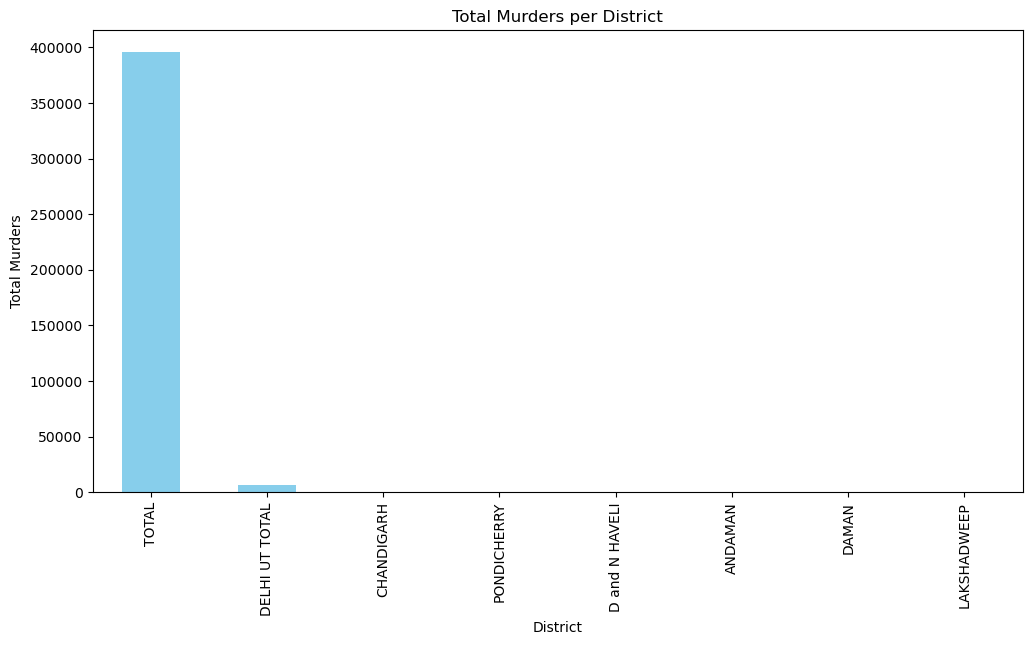

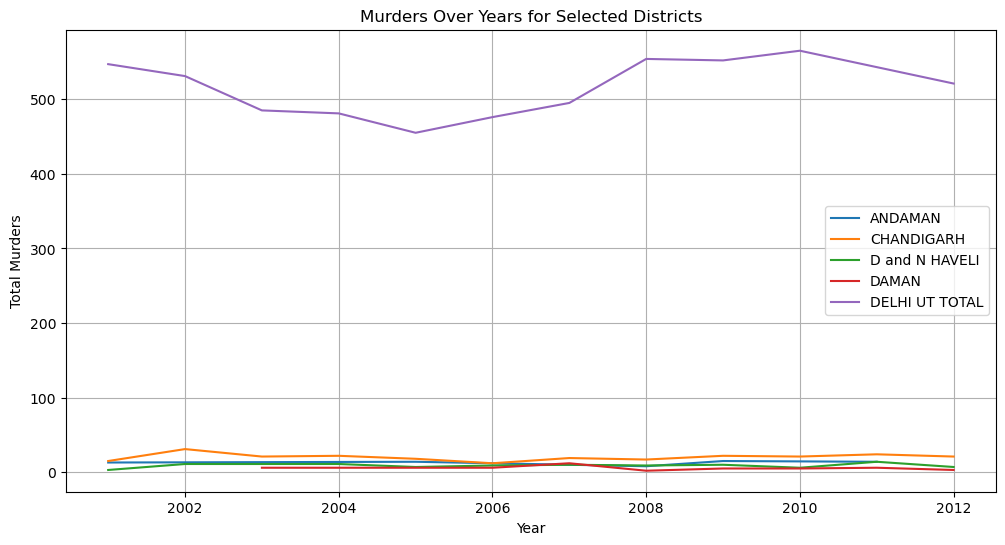

In [36]:
import pandas as pd
import matplotlib.pyplot as plt


district_totals = result.groupby('DISTRICT')['TOTAL MURDER'].sum()


plt.figure(figsize=(12, 6))
district_totals.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Total Murders per District')
plt.xlabel('District')
plt.ylabel('Total Murders')
plt.xticks(rotation=90)
plt.show()

selected_districts = result['DISTRICT'].unique()[:5]  
plt.figure(figsize=(12, 6))
for district in selected_districts:
    district_data = result[result['DISTRICT'] == district]
    plt.plot(district_data['YEAR'], district_data['TOTAL MURDER'], label=district)
plt.title('Murders Over Years for Selected Districts')
plt.xlabel('Year')
plt.ylabel('Total Murders')
plt.legend()
plt.grid(True)
plt.show()
